In [1]:
using Revise # To enable editing of Reparam
using Reparam
using ForwardDiff
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


# Lagrange Interpolation

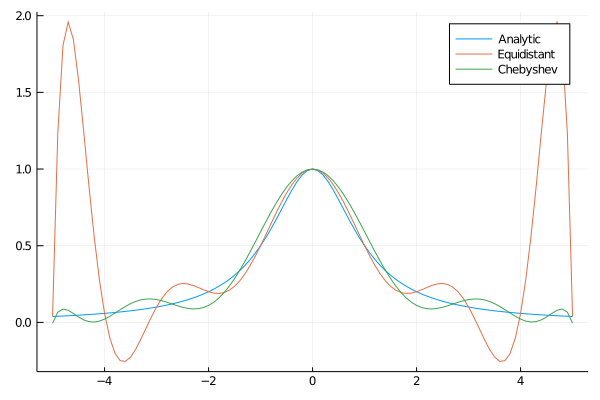

In [2]:
## Function to interpolate
f(x) = 1 / (1 + x^2)

# Interpolation grid
a, b = -5, 5
n = 10

# Get equidistant interp. points
xe = create_nodes_equidistant(a, b, n)
# Get Chebyshev interp. points
xc = create_nodes_chebyshev(a, b, n)



# Create Polynomial and Compare
pe = CreateLagrangeInterpolator(f, xe)
pc = CreateLagrangeInterpolator(f, xc)
xs = -5:0.1:5

plot(xs, f.(xs), label="Analytic")
plot!(xs, pe.(xs), label="Equidistant")
plot!(xs, pc.(xs), label="Chebyshev")

# Plot Error vs. Degree $n$ of Polynomial

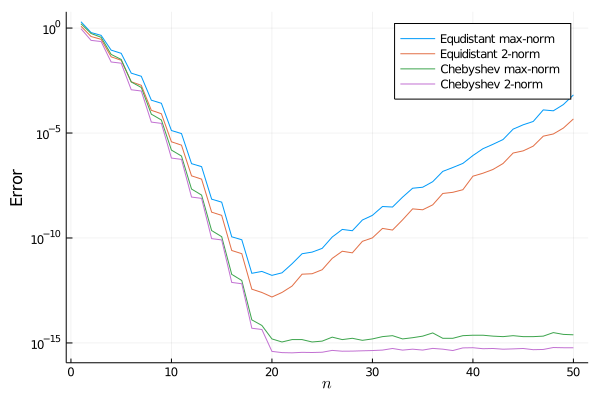

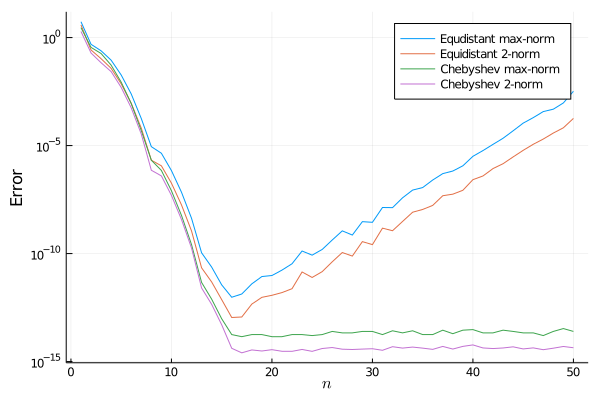

In [3]:
function PlotConvergence(f, a, b, nmax, N)
    e_eq_max = Array{Float64}(undef, nmax)
    e_eq_2 = Array{Float64}(undef, nmax)
    e_cheby_max= Array{Float64}(undef, nmax)
    e_cheby_2 = Array{Float64}(undef, nmax)

    for n in 1:nmax
        # Get equidistant interp. points
        xe = create_nodes_equidistant(a, b, n)

        # Get Chebyshev interp. points
        xc = create_nodes_chebyshev(a, b, n)

        # Create Polynomials and Compare
        pe = CreateLagrangeInterpolator(f, xe)
        pc = CreateLagrangeInterpolator(f, xc)

        # Compute error for equidistnat nodes 
        e_eq_max[n] = compute_error_max_norm(f, pe, a, b, N)
        e_eq_2[n] = compute_error_2_norm(f, pe, a, b, N)

        # Compute error for chebyshev nodes
        e_cheby_max[n]= compute_error_max_norm(f, pc, a, b, N)
        e_cheby_2[n] = compute_error_2_norm(f, pc, a, b, N)
    end
    
    plot(e_eq_max, label="Equdistant max-norm", yscale=:log10, xlabel="\$n\$", ylabel="Error")
    plot!(e_eq_2, label="Equidistant 2-norm")
    plot!(e_cheby_max, label="Chebyshev max-norm")
    plot!(e_cheby_2, label="Chebyshev 2-norm")
end

g(x) = cos(2*pi*x)
h(x) = exp(3x)*sin(2x)


display(PlotConvergence(g, 0, 1, 50, 1001))
PlotConvergence(h, 0, 1, 50, 1001)

# Piecewise Interpoaltion Polynomial

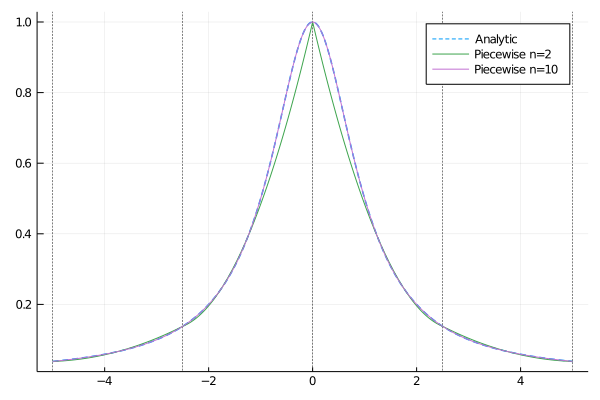

In [4]:
# Set interval and number of subintervals
a, b = (-5, 5)
K = 4

# Create knot-vector and piecewise polynomial
V = range(a, b, length=K+1)
P2 = CreatePiecewiseLagrangeInterpolator(f, V, 2)
P10 = CreatePiecewiseLagrangeInterpolator(f, V, 10)

# Visualize
xs = a:0.01:b
plot(xs, f.(xs), label="Analytic", ls=:dash, lw=1.5)
plot!(V, color="black", label="", seriestype=:vline, ls=:dash, lw=0.5)
plot!(xs, P2.(xs), label="Piecewise n=2")
plot!(xs, P10.(xs), label="Piecewise n=10")

## Convergence for Piecewise Polynomial

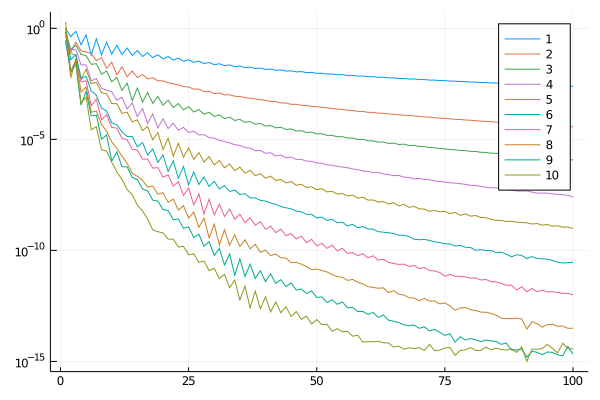

In [5]:
# Interval to evaluate/interpolate
a, b = (-5, 5)
N = 1001

nmax = 10
Kmax = 100

E = Array{Float64, 2}(undef, Kmax, nmax)

for K in 1:Kmax
    # Create knot-vector and piecewise polynomial
    V = range(a, b, length=K+1)
    for n in 1:nmax
        P = CreatePiecewiseLagrangeInterpolator(f, V, n)
        E[K, n] = compute_error_max_norm(f, P, a, b, N)
    end
end

plot(yscale=:log10)
for n in 1:nmax
    plot!(E[:, n], label="$n")
end
plot!()

# Gradient Descent Optimized Interpolation Nodes

[GD] Iter =    0 | f(x)=    3.3650618425 | |df| =   20.4429257059 | a =          Inf
[GD] Iter =    1 | f(x)=    3.3650618425 | |df| =   20.4429257059 | a =  5.00000e-01
[GD] Iter =    2 | f(x)=    1.2625459599 | |df| =    8.3557013024 | a =  5.00000e-01
[GD] Iter =    3 | f(x)=    0.4773584758 | |df| =    2.8373593370 | a =  5.00000e-01
[GD] Iter =    4 | f(x)=    0.1754756887 | |df| =    0.9033492175 | a =  5.00000e-01
[GD] Iter =    5 | f(x)=    0.0877423017 | |df| =    0.3220302823 | a =  5.00000e-01
[GD] Iter =    6 | f(x)=    0.0396384908 | |df| =    0.0869835181 | a =  2.50000e-01
[GD] Iter =    7 | f(x)=    0.0326183723 | |df| =    0.0304852051 | a =  2.50000e-01
[GD] Iter =    8 | f(x)=    0.0313550241 | |df| =    0.0336936247 | a =  1.25000e-01
[GD] Iter =    9 | f(x)=    0.0297691608 | |df| =    0.0083186903 | a =  6.25000e-02
[GD] Iter =   10 | f(x)=    0.0296329865 | |df| =    0.0077504278 | a =  3.12500e-02
[GD] Iter =   11 | f(x)=    0.0295272488 | |df| =    0.0022553884

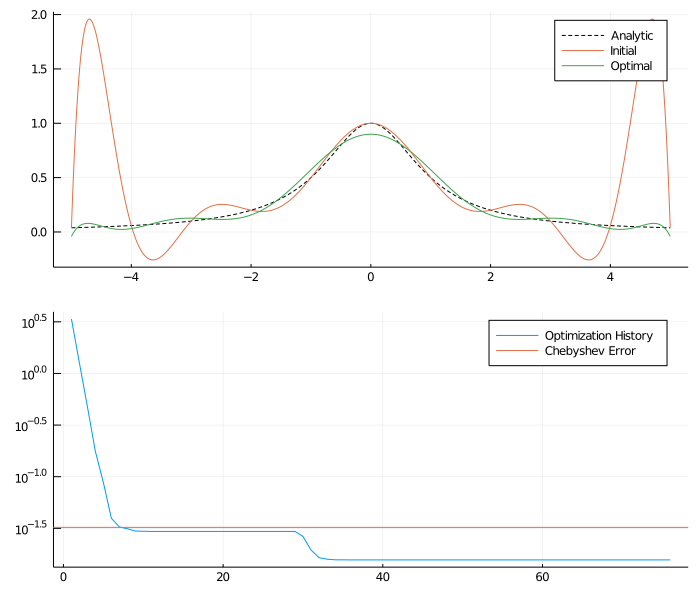

In [6]:
## Function to interpolate
f(x) = 1 / (1 + x^2)

# Interpolation grid
a = -5
b =  5
n = 10

# Fine grid for plotting and evaluation
N = 1001
xs = range(a, b, length=N)


# Cost function
function C(X)
    x_fine = range(a, b, length=N)
    p = CreateLagrangeInterpolator(f, X)
    return (b-a)/N * square_dist_sum(f, p, x_fine)
end

# Gradient of cost function
∇C(x) = ForwardDiff.gradient(C, x)


# Initial nodes, and chebyshev for comparison
xc = create_nodes_chebyshev(a, b, n)
x0 = create_nodes_equidistant(a, b, n)


# Create a config for the linesearch.
linesearch_config = Reparam.LineSearchConfig(100, 0.1, 0.9)

# Perform optimzation
xopt, history = GradientDescent(C, ∇C, x0, gtol=1e-8, verbosity=1, lsconfig=linesearch_config)

# Create interpolators: Initial, Chebyshev and optimized
p0 = CreateLagrangeInterpolator(f, x0,)
popt = CreateLagrangeInterpolator(f, xopt)
pc = CreateLagrangeInterpolator(f, xc)


# Compute chebyshev error as benchmark
error_cheby = (b - a) / N * square_dist_sum(f, pc, xs)


# Plot the function before and after optimization
p1 = plot(xs, f.(xs), ls=:dash, c="black", label="Analytic")
plot!(xs, p0.(xs), label="Initial")
plot!(xs, popt.(xs), label="Optimal")

# Create convergence plots 
p2 = plot(history[1:end-1], yscale=:log10, label="Optimization History")
plot!([error_cheby], seriestype=:hline, label="Chebyshev Error")

# Collect into subplots
plot(p1, p2, layout=grid(2,1), size=(700, 600))

# Radial Basis Function Interpolation

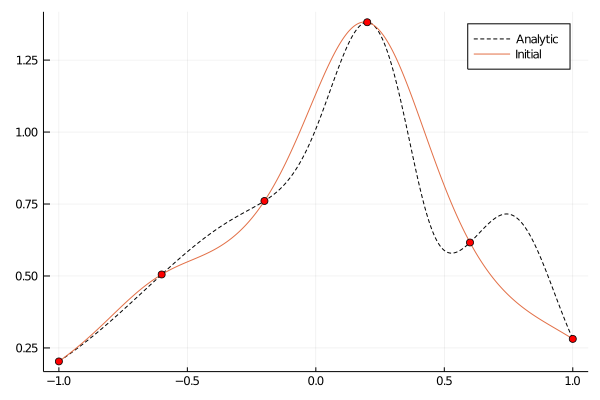

In [7]:
# Function to interpolate
function Runge(x)
    return (0.75 * (exp(-(9x-2)^2 / 4) + exp(-(9x+1)^2 / 49))
        + 0.5 * exp(-(9x - 7)^2 / 4) - 0.1 * exp(-(9x-4)^2))
end


# Interpolation interval 
a, b = (-1, 1)
n = 5 

# Create initial equidistant set of nodes
x0 = create_nodes_equidistant(a, b, n)
# x0 = create_nodes_chebyshev(a, b, n)


# Set exponential parameter
ε0 = [10. for xi in x0]
# ε0 = rand(n+1) * 10


# Create Rbf Interpolator
R0 = CreateRbfInterpolator(Runge, x0, ε0)

# Create plotting grid, and plot solutions
xs = -1:0.005:1
plot(xs, Runge.(xs), label="Analytic", ls=:dash, color="black")
plot!(xs, R0.(xs), label="Initial")
plot!(x0, Runge.(x0), seriestype=:scatter, color="red", label="")

## Optimized Nodes and Parameters for RBF-Interpolation

[GD] Iter =    0 | f(x)=    0.0007274287 | |df| =    0.0100733985 | a =          Inf
[GD] Iter =    1 | f(x)=    0.0007274287 | |df| =    0.0100733985 | a =  3.12500e-02
[GD] Iter =    2 | f(x)=    0.0005081348 | |df| =    0.0043934701 | a =  1.56250e-02
[GD] Iter =    3 | f(x)=    0.0004571409 | |df| =    0.0023161010 | a =  1.56250e-02
[GD] Iter =    4 | f(x)=    0.0004312208 | |df| =    0.0015703291 | a =  3.12500e-02
[GD] Iter =    5 | f(x)=    0.0003926065 | |df| =    0.0016729486 | a =  1.56250e-02
[GD] Iter =    6 | f(x)=    0.0003755406 | |df| =    0.0011708149 | a =  7.81250e-03
[GD] Iter =    7 | f(x)=    0.0003684149 | |df| =    0.0008620895 | a =  1.56250e-02
[GD] Iter =    8 | f(x)=    0.0003582845 | |df| =    0.0005796349 | a =  3.90625e-03
[GD] Iter =    9 | f(x)=    0.0003565746 | |df| =    0.0004511545 | a =  7.81250e-03
[GD] Iter =   10 | f(x)=    0.0003541015 | |df| =    0.0004883305 | a =  1.95313e-03
[GD] Iter =   11 | f(x)=    0.0003534261 | |df| =    0.0002926633

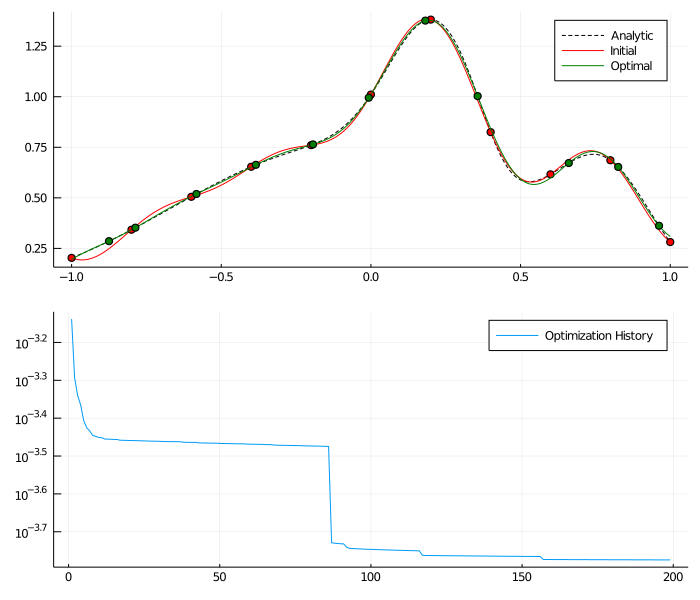

In [8]:
# Interpolation interval 
a, b = (-1, 1)
n = 10
# Number of evalutaion points in fine grid for error evaluation
N = 1001

# Cost function 
function C(X)
    # Get split between nodes and exp parameters
    half  = Int(length(X) / 2)
    
    # Create evaluation grid
    xfine = range(a, b, length=N)
    
    # Create Interpolator for the given set of nodes and parameters
    rbf = CreateRbfInterpolator(Runge, X[1:half], X[half+1:end])
    
    # Compute approximate square 2-norm over the interval
    return (b-a)/N * square_dist_sum(Runge, rbf, xfine)
end

# Create gradient function
∇C(x) = ForwardDiff.gradient(C, x)

# Initial nodes, and chebyshev for comparison
x0 = create_nodes_equidistant(a, b, n)


# Set exponential parameter
ε0 = [5. for xi in x0]
# ε0 = rand(n+1) * 10


# Create a config for the linesearch.
linesearch_config = Reparam.LineSearchConfig(100, 0.6, 0.7)

# Perform optimzation
xopt, history = GradientDescent(C, ∇C, [x0..., ε0...], gtol=1e-8, verbosity=1, lsconfig=linesearch_config,
        maxiter=200)
xopt, εopt = xopt[1:n+1], xopt[n+2:end]


# Create interpolators: Initial and optimized
R0 = CreateRbfInterpolator(Runge, x0, ε0)
Ropt = CreateRbfInterpolator(Runge, xopt, εopt)


# Plot the function before and after optimization
p1 = plot(xs, Runge.(xs), ls=:dash, c="black", label="Analytic")

plot!(xs, R0.(xs), label="Initial", color="red")
plot!(x0, Runge.(x0), seriestype=:scatter, label="", color="red")

plot!(xs, Ropt.(xs), label="Optimal", color="green")
plot!(xopt, Runge.(xopt), seriestype=:scatter, label="", color="green")

# Create convergence plots 
p2 = plot(history[1:end-1], yscale=:log10, label="Optimization History")

# Collect into subplots
plot(p1, p2, layout=grid(2,1), size=(700, 600))